#Στειροπούλου Ευαγγελία 
###Α.Μ. 111520180016
##Εργασία 2η Αναγνώριση Προτύπων - Μηχανική Μάθηση



#Face recognition: 

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people ##Labeled Faces in the Wild
from sklearn.decomposition import PCA
import glob
import re
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

##I: Συνάρτηση loadImages:

In [36]:
def loadImages(path, set_number):
    set_folder = "faces"
    persons = glob.glob(set_folder+"/*.png")
    # assume X is a 2500xN matrix containing N 50x50 images
    faces = []
    labels = []
    for person in persons:
        face = plt.imread(person)
        person_number = int(re.split("_", (re.split(set_folder+"/person", person))[1])[0])
        faces.append(face.flatten())
        labels.append(person_number)

    faces = np.array(faces)
    labels = np.array(labels)
    return faces, labels

Όπως αναφέρεται στην εκφώνηση, η προεπεξεργασία της εικόνας είναι απαραραίτητη, και γίνεται με την αφαίρεση της μέσης τιμής της και στην συνέχεια με την διαίρεση με την τυπική απόκλιση των τιμών της.

In [37]:
def normalization(faces):
    X = np.ndarray(shape=faces.shape) #Normalized data matrix
    for i in range(faces.shape[0]):
        X[i] = (faces[i] - np.mean(faces[i]))/np.std(faces[i]) #Mean normalization of the data

    return X

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

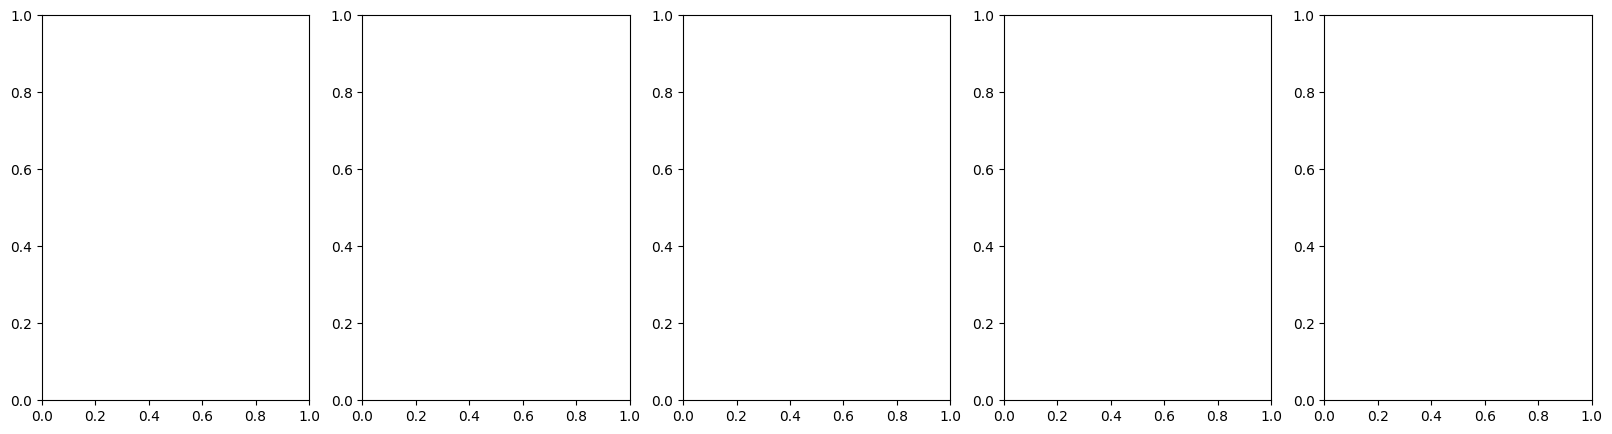

In [49]:
X_set1, labels_set1 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '01')
average_face = np.mean(X_set1, axis=0)

X_train_set = normalization(X_set1)

accuracy = []

dimentions = [9,30]
for d in dimentions:
    pca = PCA(n_components=d, whiten=True)
    pca.fit(X_train_set)
    X_train_pca = pca.transform(X_train_set)
    KNeighborsClassifier(n_neighbors = 1).fit(X_train_pca, labels_set1)

    figur, ax = plt.subplots(1, 5, figsize=(20, 5))
    for i in range(5):
        X_set, labels_set = loadImages("/home/eva/Documents/machine_learning/project2/faces", '0'+str(i+1))
        X_test_set = normalization(X_set)
        X_test_pca = pca.transform(X_test_set)
        labels_pred = KNeighborsClassifier(n_neighbors = 1).predict(X_test_pca)
        # akriveia taksinomisis
        accuracy.append(int(accuracy_score(y_set, y_pred)*100))

        # ta labels poy tha xreiastoun parakato
        names =[1,2,3,4,5,6,7,8,9,10]

        # ektipono ektos apo to Score kai to confusion matrix
        cfmatr = confusion_matrix(y_set, y_pred)
        cmd = ConfusionMatrixDisplay(cfmatr, display_labels=names)
        cmd.plot(ax=axes[i-1])
        cmd.ax_.set_title("Set_"+str(i)+ " Score: "+str(int(accuracy_score(y_set, y_pred)*100))+"%")
        cmd.im_.colorbar.remove()
        cmd.ax_.set_xlabel('')

    # gia to plotting ton confusion matrixes
    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.tight_layout()
    plt.show()

In [ ]:

X_set2, labels_set2 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '02')

X_set3, labels_set3 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '03')

X_set4, labels_set4 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '04')

X_set5, labels_set5 = loadImages("/home/eva/Documents/machine_learning/project2/faces", '05')

# Step 3: Compute the covariance matrix
covariance_matrix = np.cov(X.T)

# Step 4: Compute the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 5: Choose the number of principal components
n_components = 9

# Step 6: Project the data onto the principal components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)


